In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import shapiro
import os
from scipy.stats import linregress

# Reading PCB sheets

In [2]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[0]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
pcb

,1,2,3,4,5,7,10,11,13-Trembleur
Units,,,,,,,,,
PCB-1,5.120000,10.770000,28.770000,26.070000,18.570000,7.210,5.95000,5.980000,20.07000
PCB-2,2.050000,4.240000,8.320000,12.030000,7.980000,5.600,2.68000,4.350000,13.53000
PCB-3,4.040000,9.480000,27.980000,21.280000,15.780000,12.080,6.23000,7.380000,21.78000
PCB-4,3.570000,9.350000,35.650000,31.050000,29.650000,1.310,1.10000,3.970000,6.75000
PCB-5,NaN,NaN,2.741400,1.561400,1.421400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
PCB-205,0.153818,0.299818,2.402818,NaN,1.002818,NaN,NaN,0.730818,NaN
PCB-206,1.440090,3.220090,16.780090,3.550090,8.840090,NaN,1.11009,6.010090,2.74009
PCB-207,0.134818,0.792818,2.942818,0.505818,1.642818,NaN,NaN,1.002818,NaN


# Shapiro

In [3]:
shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
shapi.columns = ['statistic', 'pvalue']
shapi
for i in pcb.index:
    shapi.loc[i, :] = shapiro(pcb.loc[i, :])
    if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

In [4]:
shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
shapi2
for i in pcb.columns:
    shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())
shapi2

,1,2,3,4,5,7,10,11,13-Trembleur
statistics,5.020543e-01,5.851939e-01,5.668298e-01,5.544909e-01,4.684290e-01,3.938100e-01,5.240053e-01,4.871362e-01,6.642563e-01
pvalue,1.845591e-17,4.617736e-16,7.504369e-18,4.386655e-17,1.497352e-19,1.969833e-18,5.192457e-17,3.511964e-18,2.860335e-13


## repeating shapiro for each pcb sheet

In [5]:
sheets = ("blank_corrected", "lipid_normalized")
shapiro_dict = {}
for sheet in sheets:
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    pcb.set_index('Units', inplace=True)
    selection = [i for i in pcb.index if i[:3] == 'PCB']
    pcb = pcb.loc[selection, :]

    shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
    shapi.columns = ['statistic', 'pvalue']
    shapi
    for i in pcb.index:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :])
        if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
            shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

    shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
    shapi2
    for i in pcb.columns:
        shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())

    shapiro_dict.update({sheet: (shapi, shapi2)})

In [6]:
sheets = ("blank_corrected", "lipid_normalized")
shapiro_log = {}
for sheet in sheets:
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    pcb.set_index('Units', inplace=True)
    selection = [i for i in pcb.index if i[:3] == 'PCB']
    pcb = np.log10(pcb.loc[selection, :])

    shapi = pd.DataFrame(pcb.iloc[:, :2].copy())
    shapi.columns = ['statistic', 'pvalue']
    shapi
    for i in pcb.index:
        shapi.loc[i, :] = shapiro(pcb.loc[i, :])
        if sum(pcb.loc[i, :].dropna().to_numpy() > 0) >= 3:
            shapi.loc[i, :] = shapiro(pcb.loc[i, :].dropna().to_numpy())

    shapi2 = pd.DataFrame(index = ['statistics', 'pvalue'], columns = pcb.columns, dtype='double')
    shapi2
    for i in pcb.columns:
        shapi2.loc[:, i] = shapiro(pcb.loc[:, i].dropna().to_numpy())

    shapiro_log.update({sheet: (shapi, shapi2)})

/Users/amir/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/Users/amir/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [7]:
with pd.ExcelWriter('pcb_stats.xlsx') as writer:
    for sheet in sheets:
        for i in range(2):
            shapiro_dict[sheet][i].to_excel(writer, f'shapiro{i} - {sheet}')
            shapiro_log[sheet][i].to_excel(writer, f'shapiro{i} - {sheet}')

# Proportion Plots

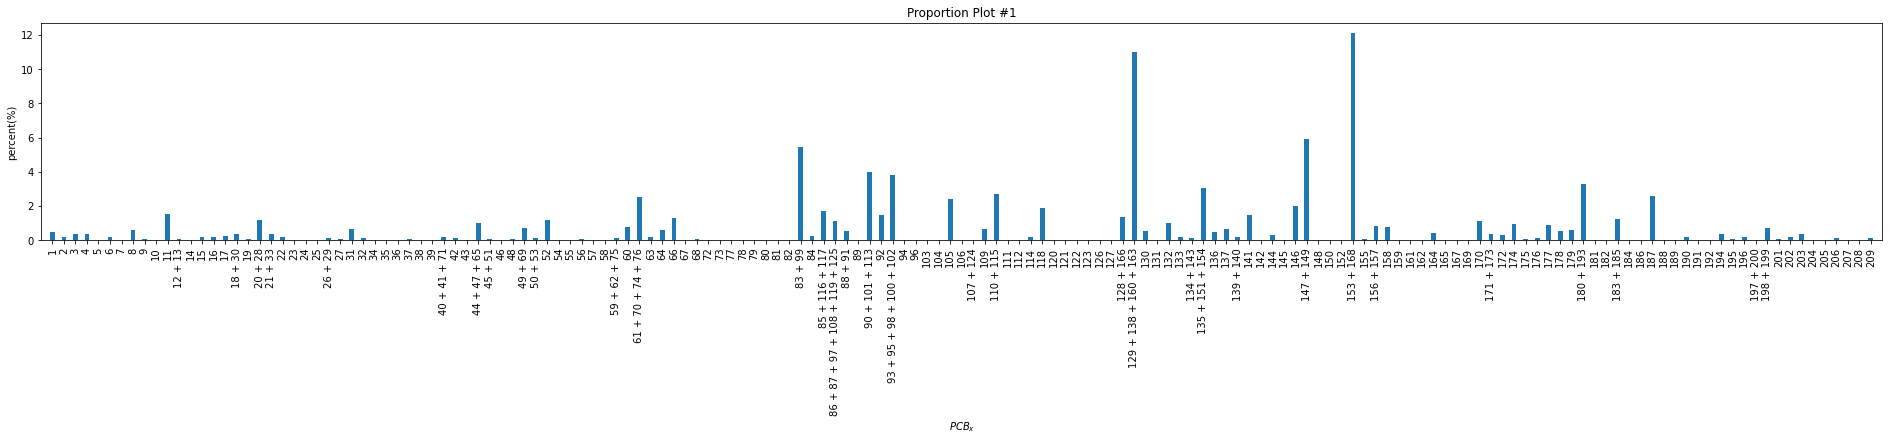

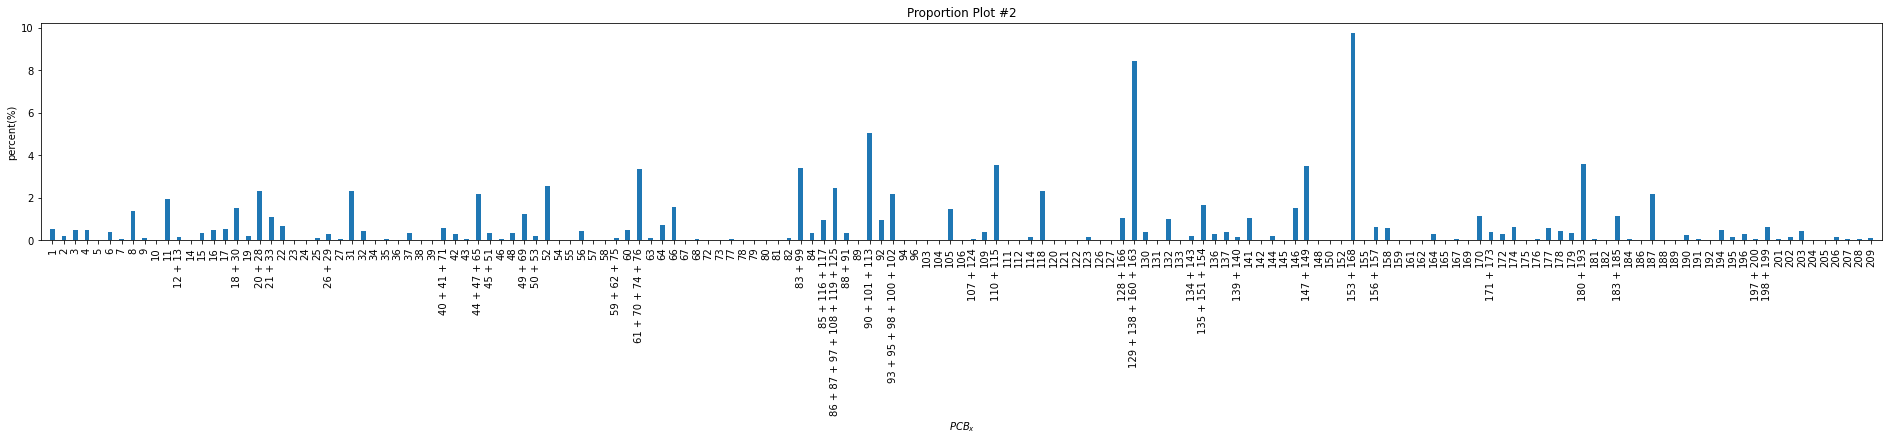

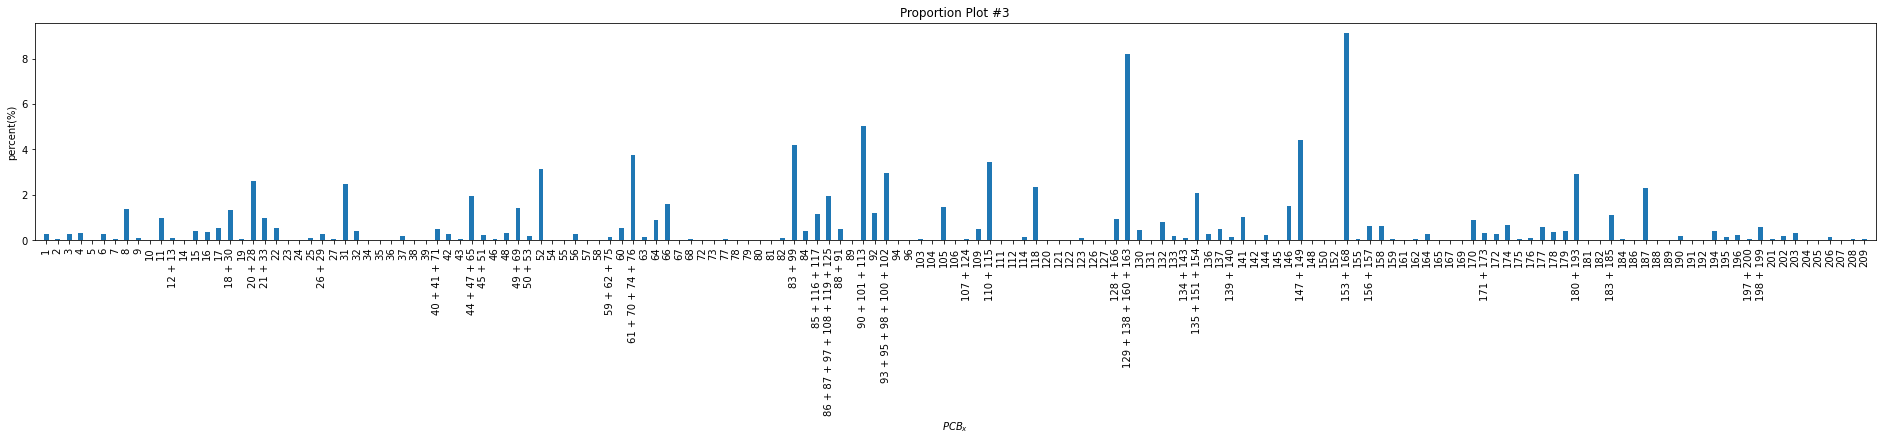

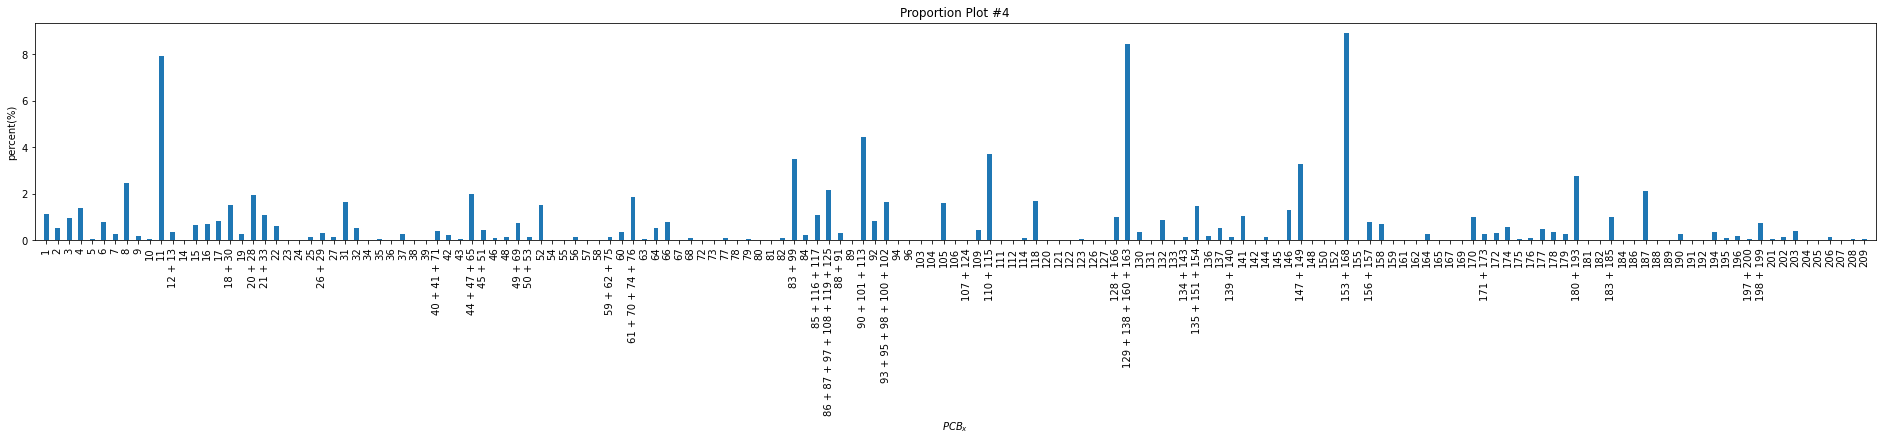

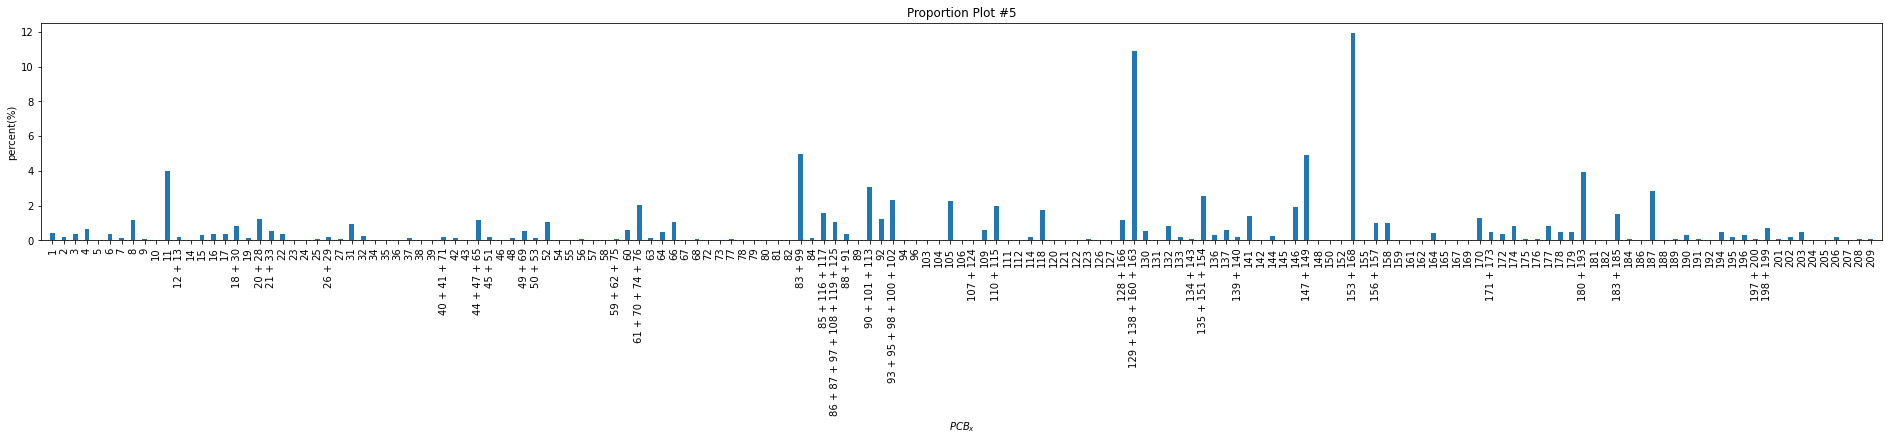

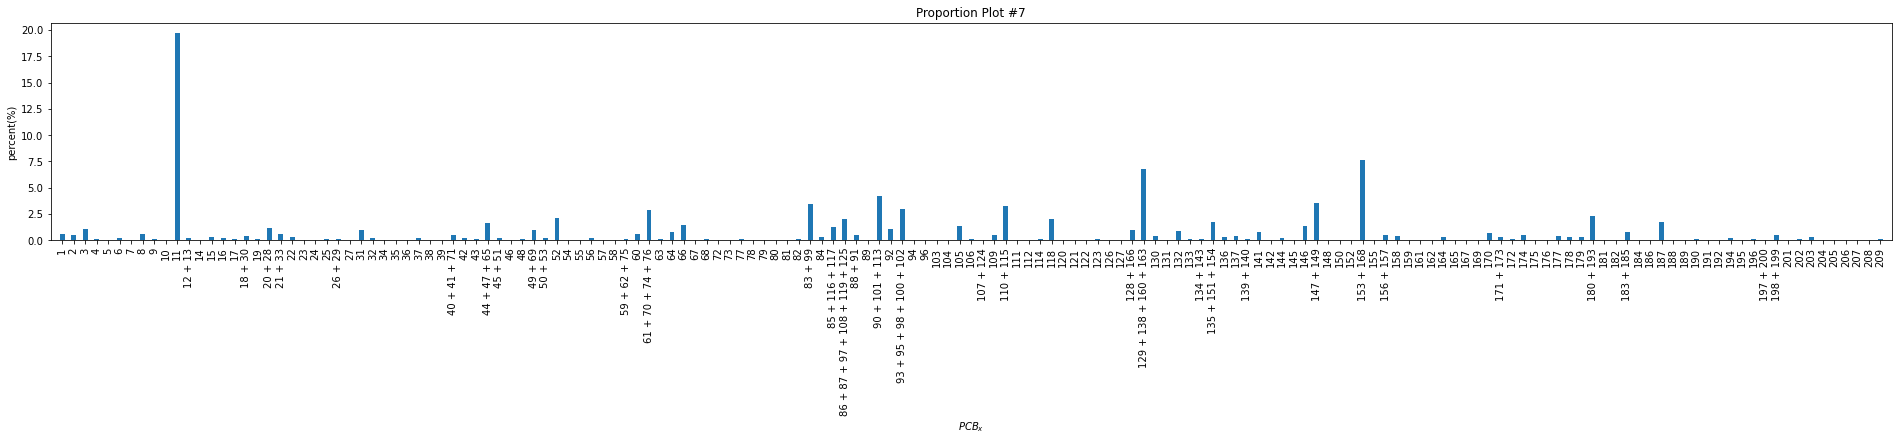

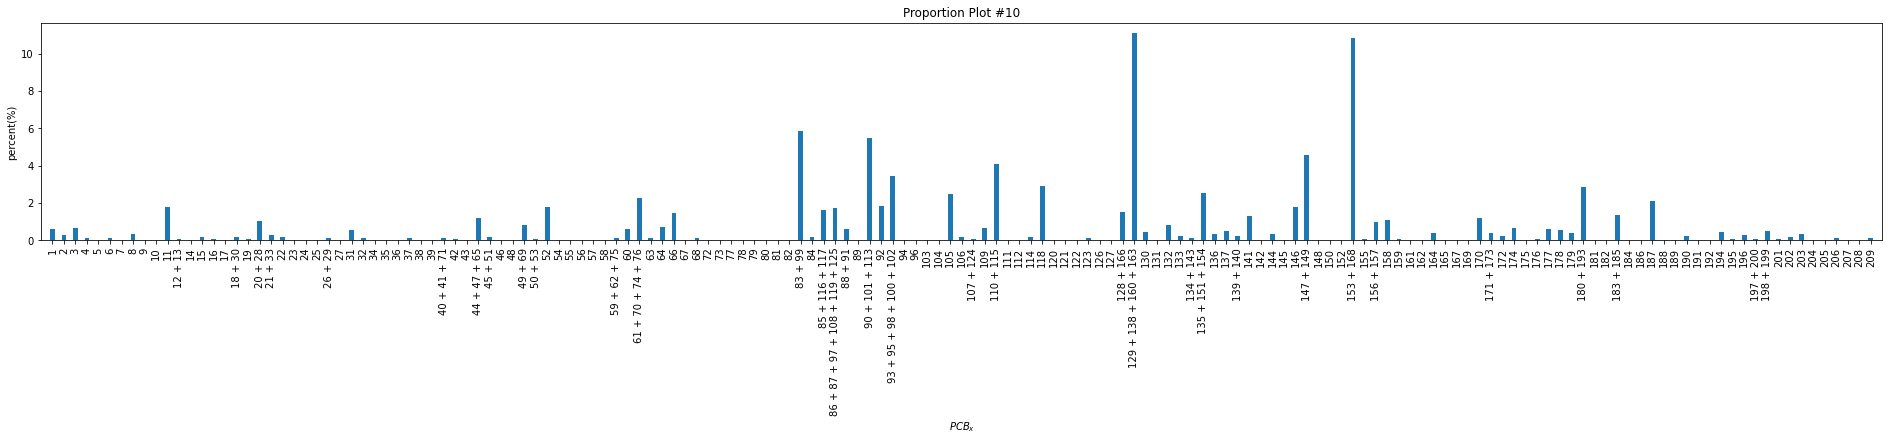

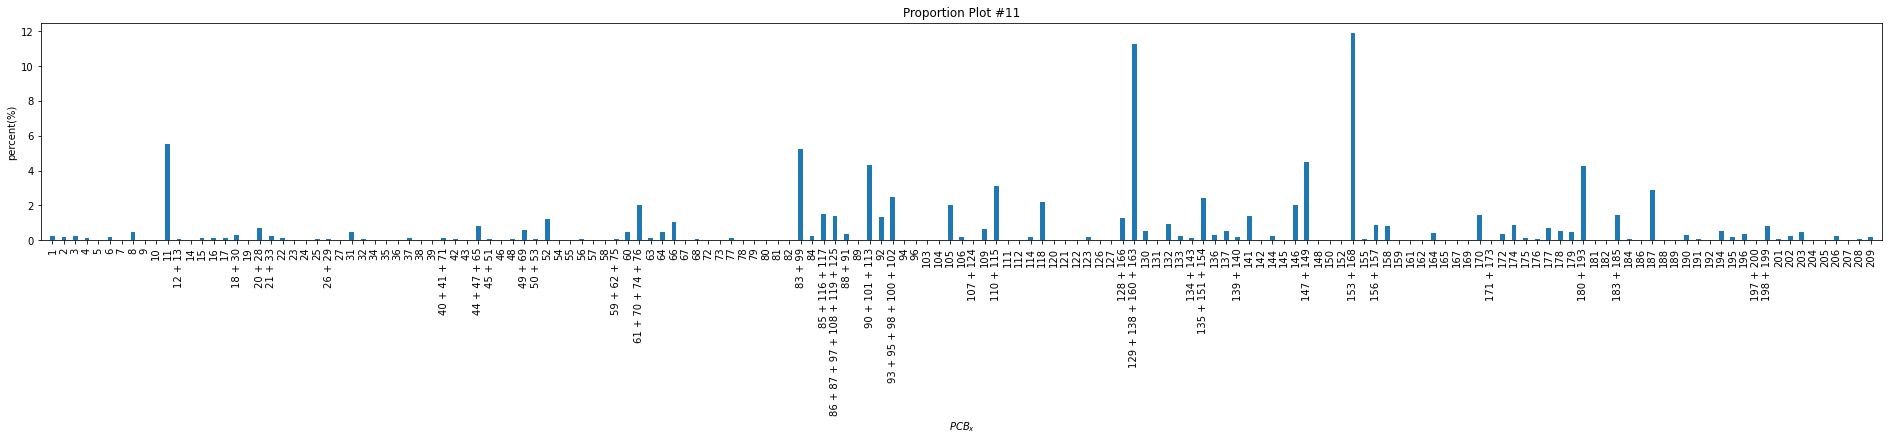

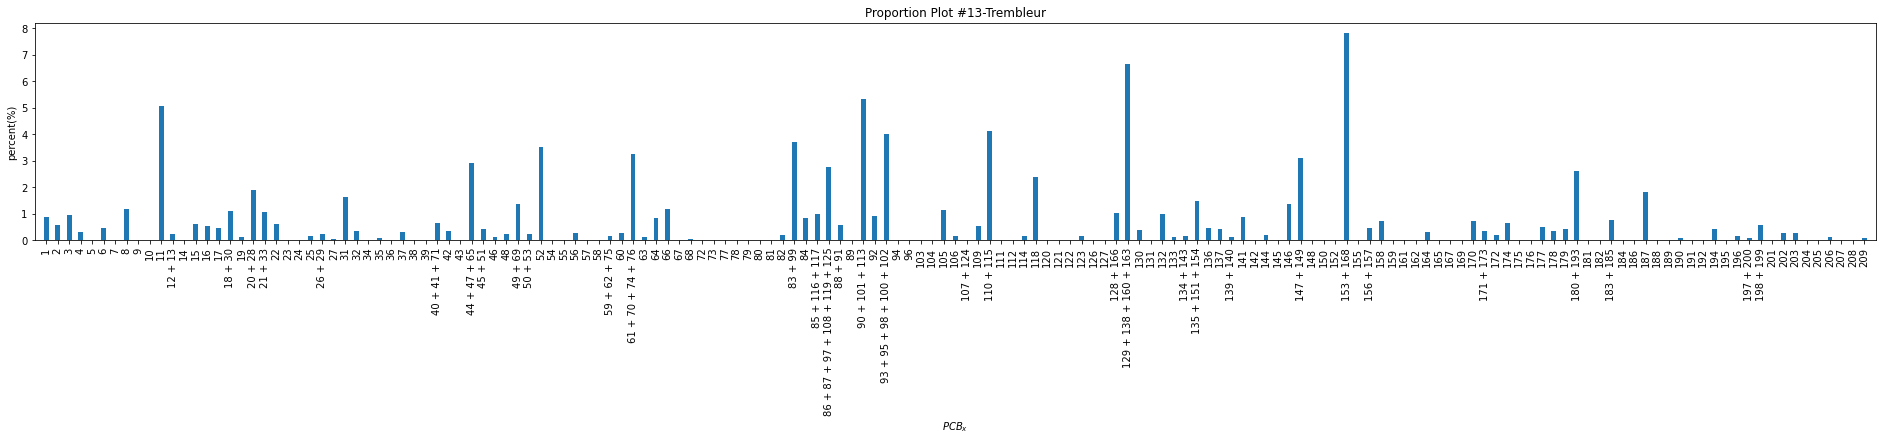

In [8]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
for col in pcb.columns:
    temp = pcb[col]
    temp = temp/temp.sum()*100
    plt.figure(figsize=(33, 4), facecolor="white")
    plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
    plt.title('Proportion Plot #' + col)
    plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
    plt.xlim(-1, len(pcb.index))
    plt.ylabel('percent(%)')
    plt.xlabel('$PCB_x$')
    if not os.path.exists('./pics/PCBs/bars/'):
        os.mkdir('./pics/PCBs/bars/')
    plt.savefig(f'./pics/PCBs/bars/{col}-proportion.jpg', bbox_inches='tight')

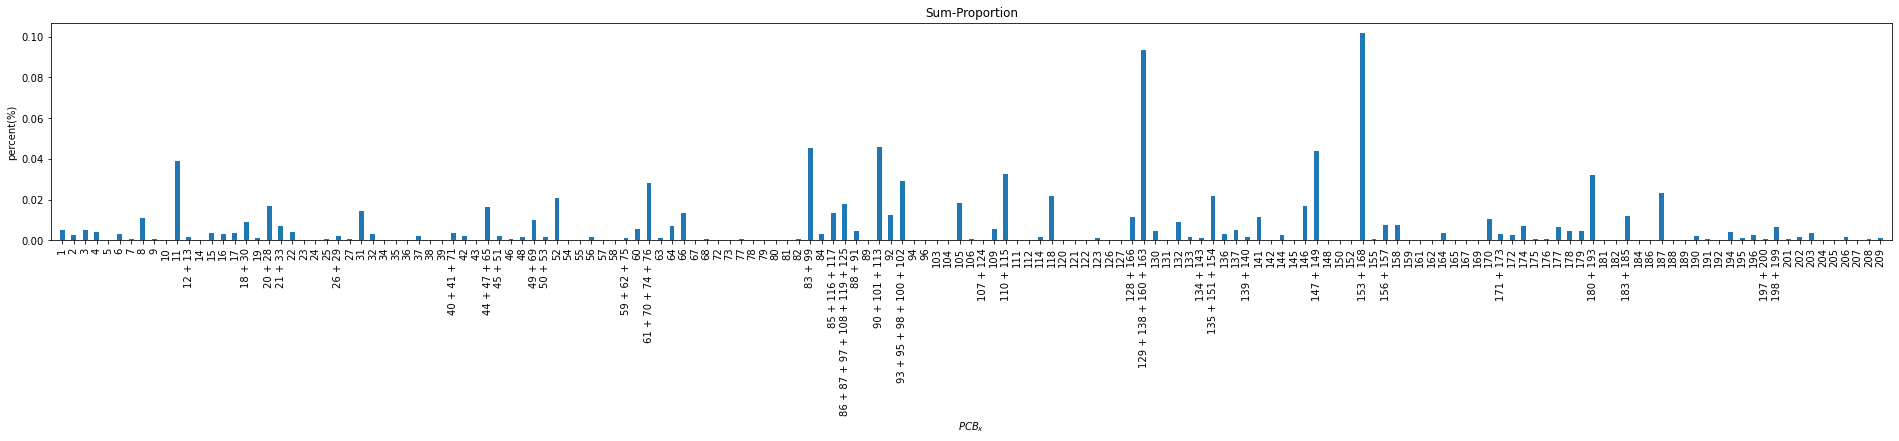

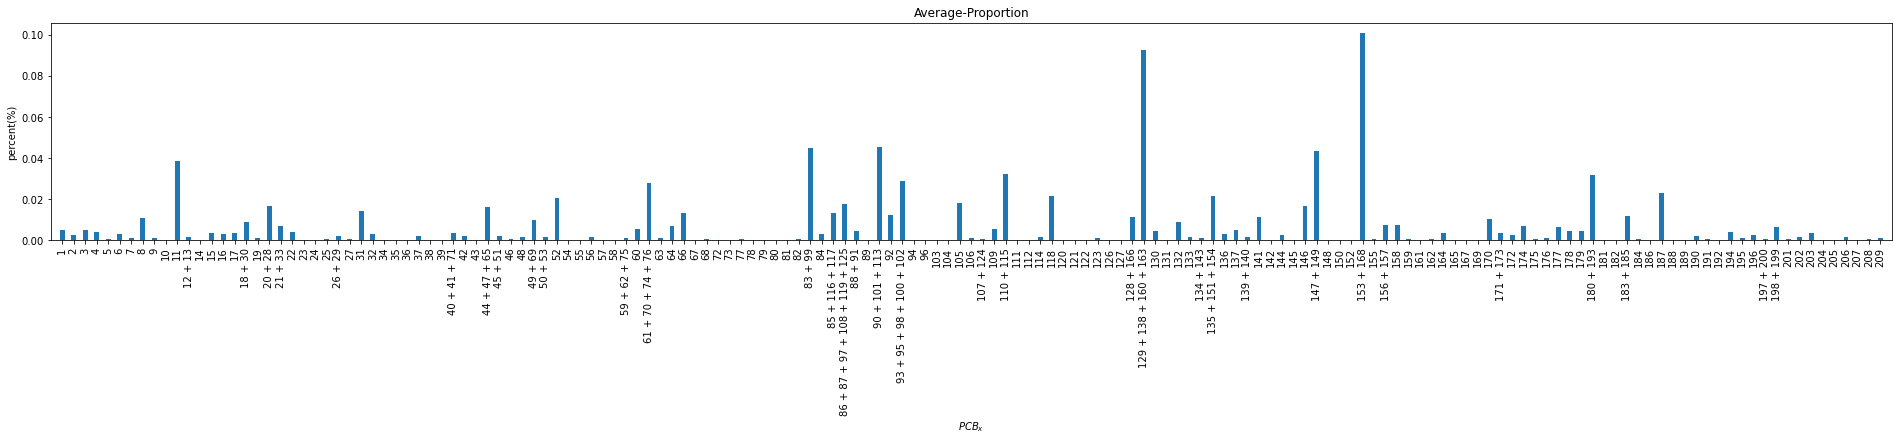

In [9]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] == 'PCB']
pcb = pcb.loc[selection, :]
temp = pcb.sum(1)
temp = temp/temp.sum()
plt.figure(figsize=(33, 4), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Sum-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
if not os.path.exists('./pics/PCBs/bars/'):
    os.mkdir('./pics/PCBs/bars/')
plt.savefig(f'./pics/PCBs/bars/SUM-proportion.jpg', bbox_inches='tight')

temp = pcb.apply(lambda x: np.average(x.dropna()) if not x.dropna().empty else 0, 1)
temp = temp/temp.sum()
plt.figure(figsize=(33, 4), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Average-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 90)
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
plt.savefig(f'./pics/PCBs/bars/average-proportion.jpg', bbox_inches='tight')

# Concentration Plots

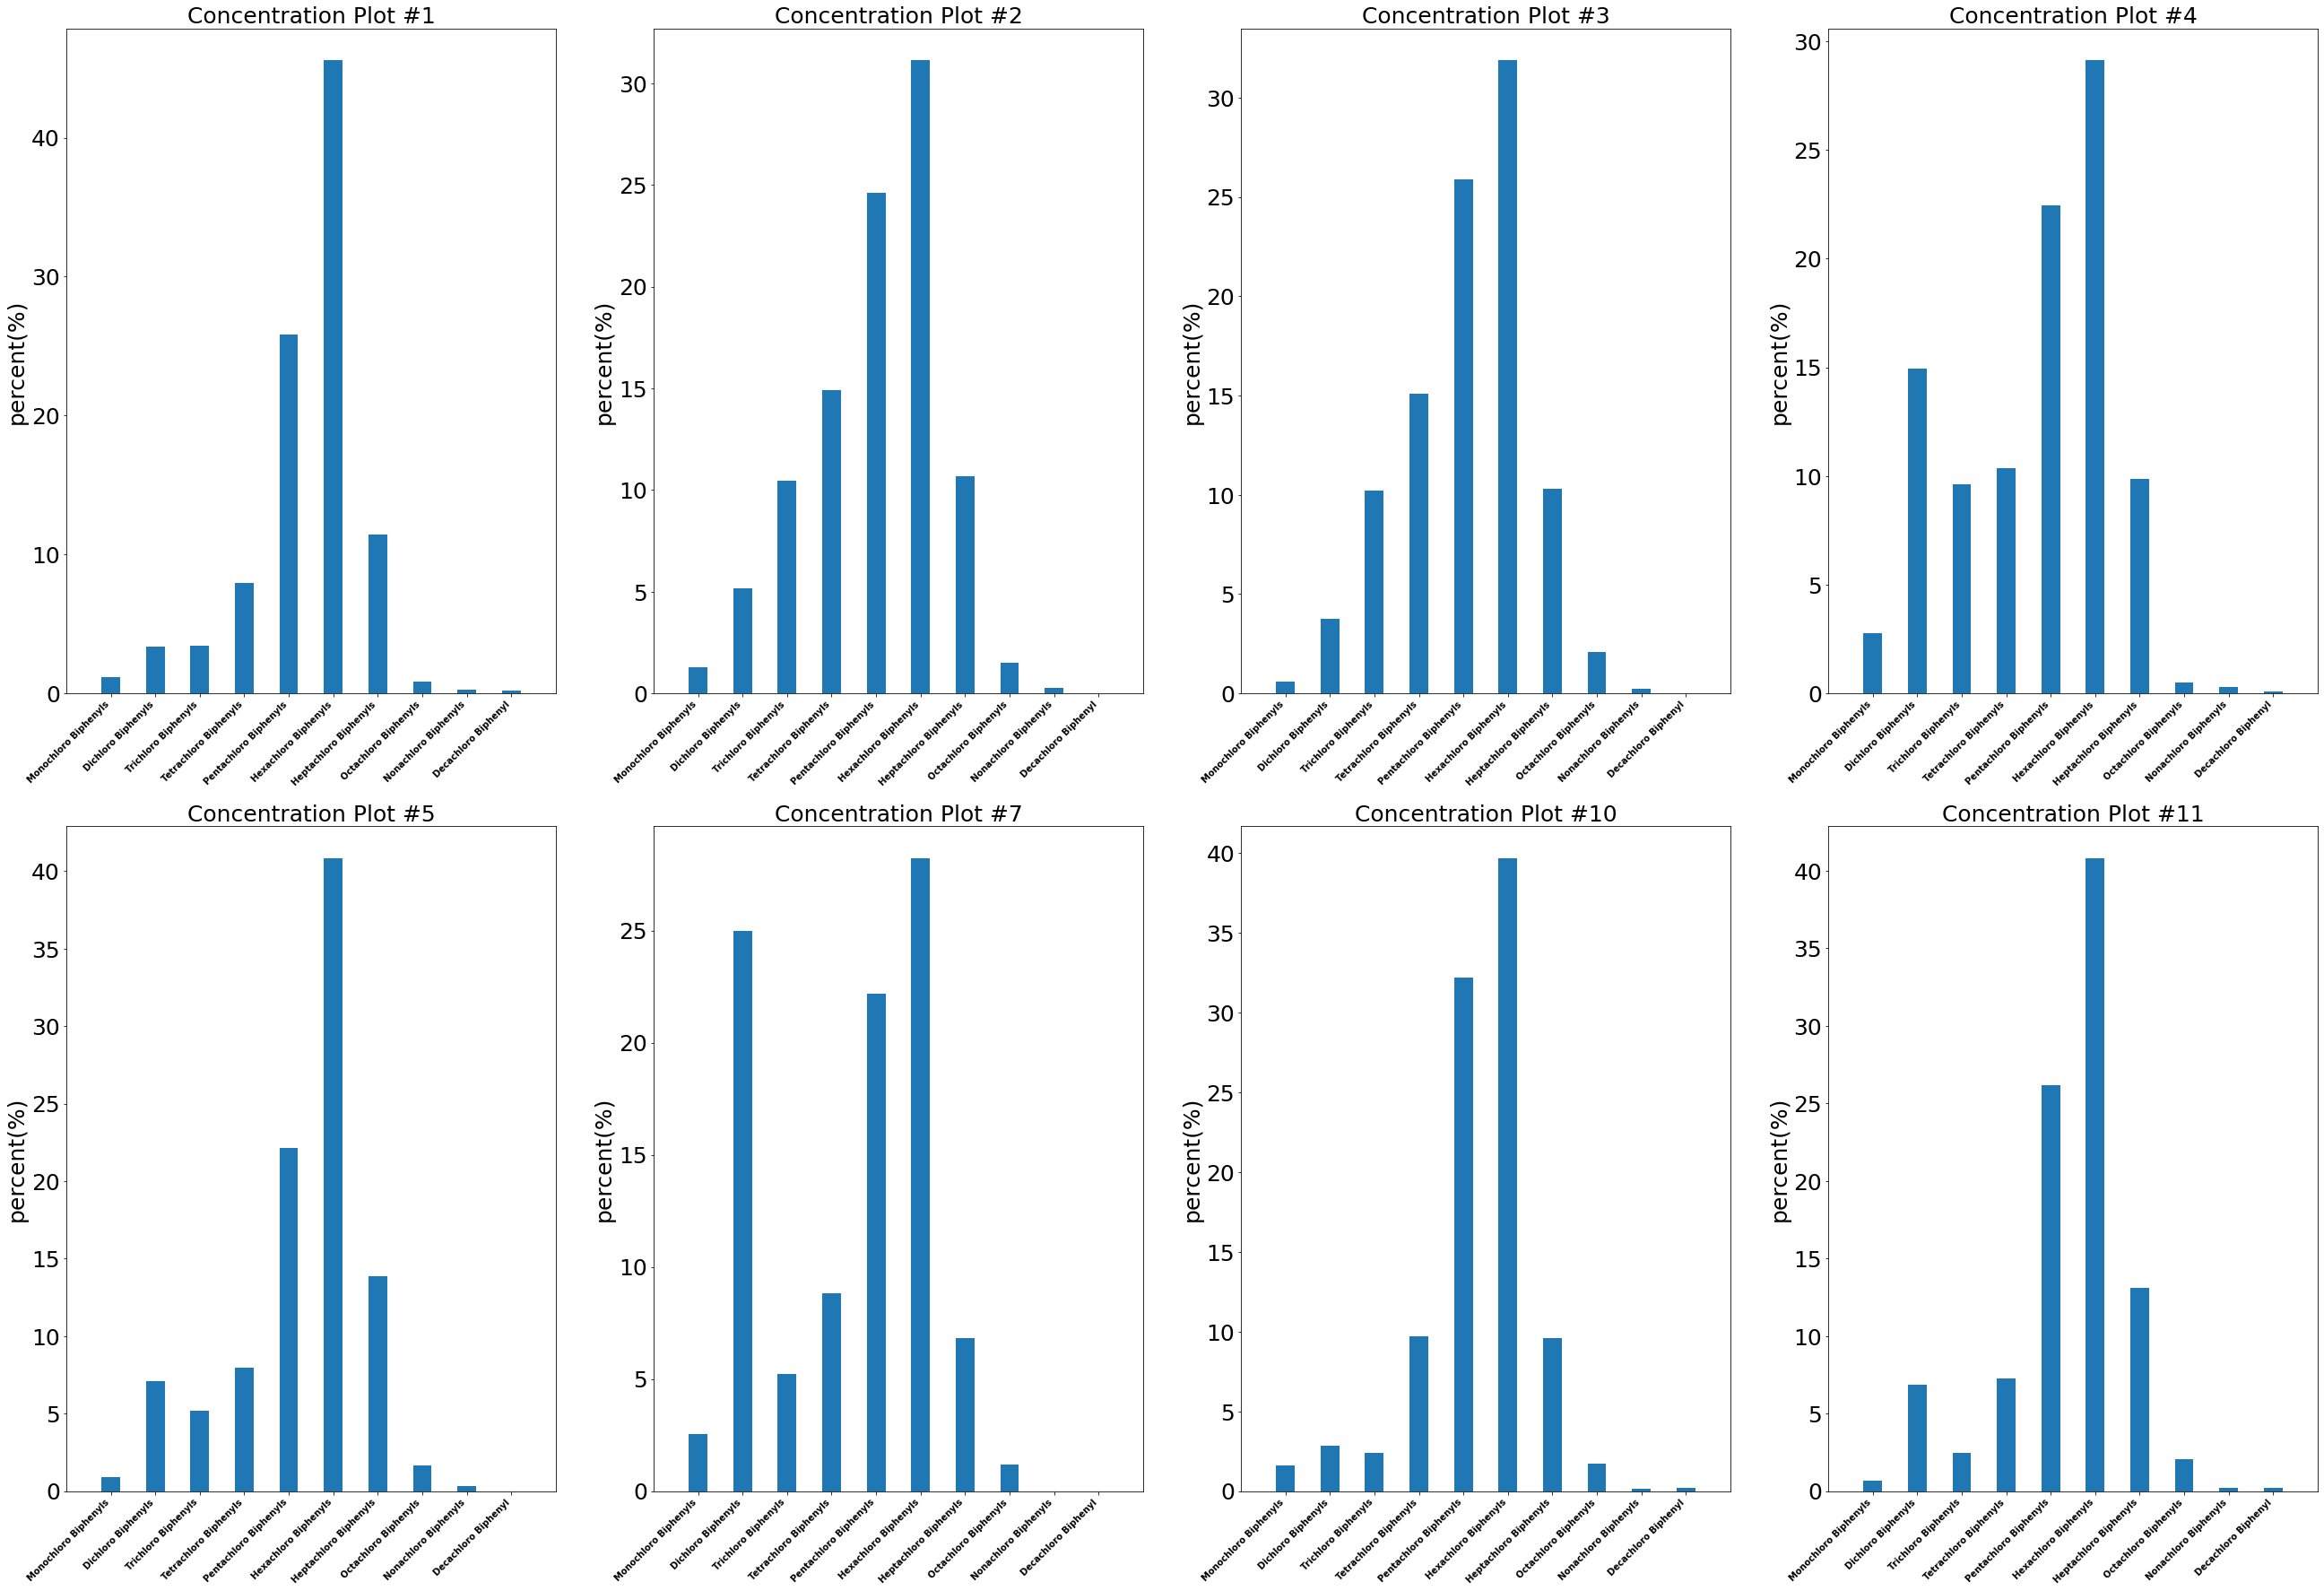

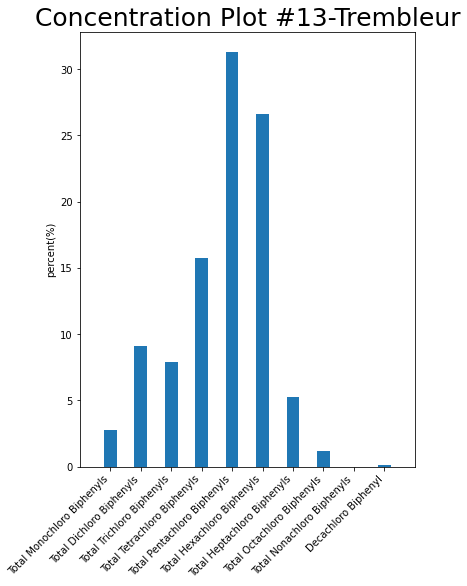

In [10]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] != 'PCB']
pcb = pcb.loc[selection, :]
pcb = pcb.iloc[:-2, :]
plt.figure(figsize=(45, 30), facecolor="white")
for i in range(len(pcb.columns)):
    if i != (len(pcb.columns)-1):
        plt.subplot(2,4,i+1)
        col = pcb.columns[i]
        temp = pcb[col]
        temp = temp/temp.sum()*100
        plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
        plt.title('Concentration Plot #' + col, fontsize = 25)
        plt.xticks(range(len(pcb.index)), pcb.index.str.removeprefix('Total '), rotation = 45, ha='right', fontweight = 'bold')
        plt.yticks(fontsize = 25)
        plt.xlim(-1, len(pcb.index))
        plt.ylabel('percent(%)', fontsize = 25)
    else:
        plt.figure(figsize = (6, 8), facecolor = 'white')
        col = pcb.columns[i]
        temp = pcb[col]
        temp = temp/temp.sum()*100
        plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
        plt.title('Concentration Plot #' + col, fontsize = 25)
        plt.xticks(range(len(pcb.index)), pcb.index, rotation = 45, ha='right')
        plt.xlim(-1, len(pcb.index))
        plt.ylabel('percent(%)')
    # plt.xlabel('$PCB_x$')
    # if not os.path.exists('./pics/PCBs/bars/'):
    #     os.mkdir('./pics/PCBs/bars/')
    # plt.savefig(f'./pics/PCBs/bars/{col}-concentration.jpg', bbox_inches='tight')

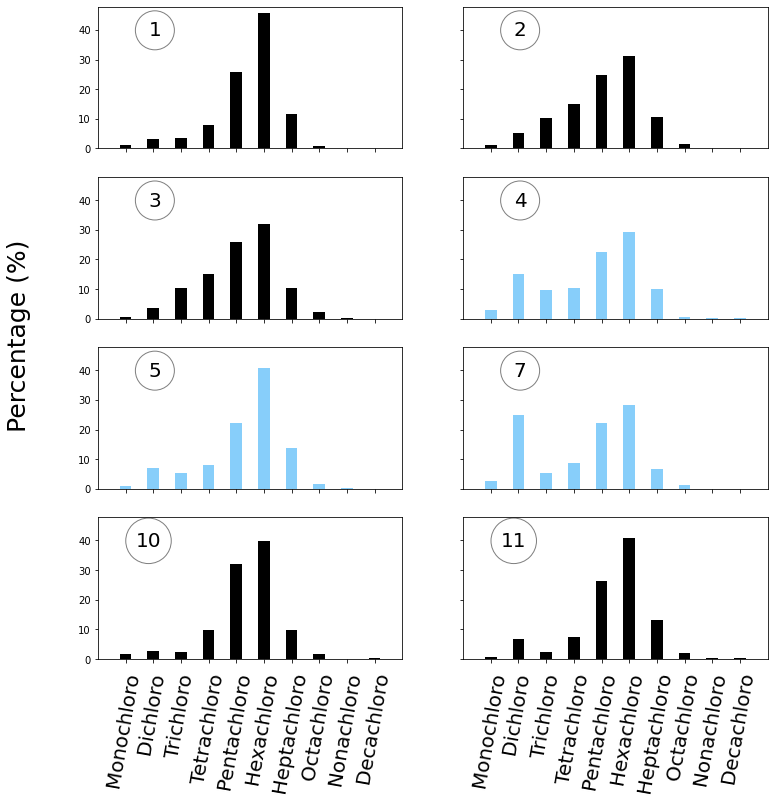

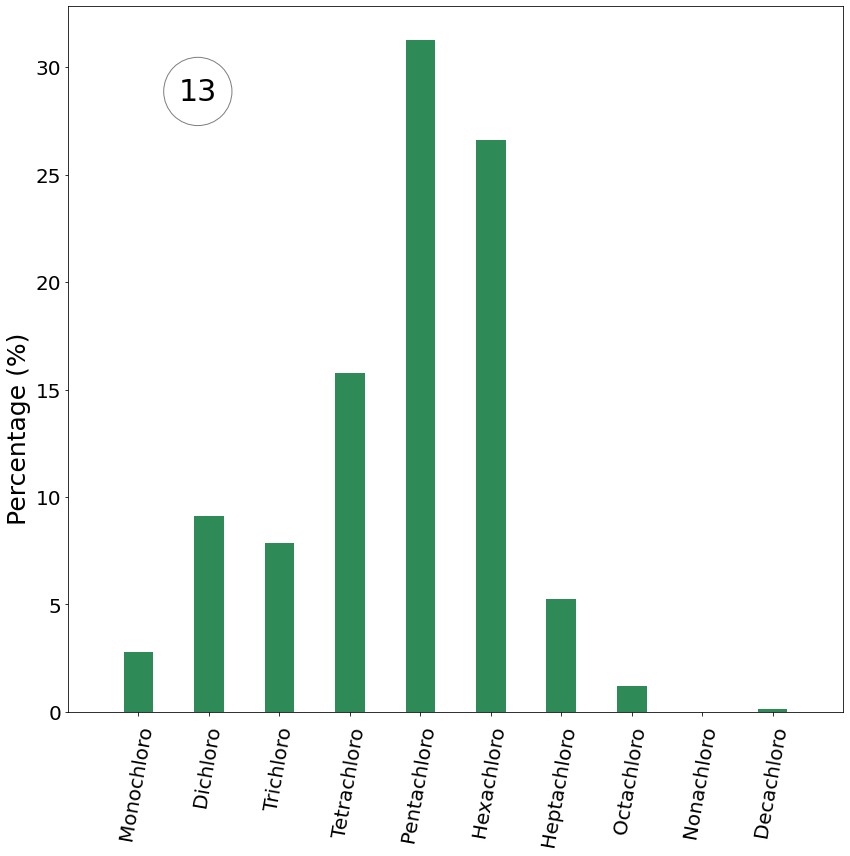

In [11]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] != 'PCB']
pcb = pcb.loc[selection, :]
pcb = pcb.iloc[:-2, :]

# Create subplots with shared y-axis
fig, axes = plt.subplots(4, 2, figsize=(12, 12), facecolor="white", sharey=True, sharex=True)
fig.supylabel("Percentage (%)", fontsize = 25)

for i, ax in enumerate(axes.flatten()):
    col = pcb.columns[i]
    temp = pcb[col]
    temp = temp / temp.sum() * 100
    if 3 < int(col) < 8:
        ax.bar(range(len(pcb.index)), temp.to_numpy(), .42, color = 'lightskyblue')
    else:
        ax.bar(range(len(pcb.index)), temp.to_numpy(), .42, color = 'k')
    plt.yticks(fontsize = 25)
    ax.set_title('', fontsize=25)
    ax.set_xticks(range(len(pcb.index)))
    ax.set_xticklabels(pcb.index.str.removeprefix('Total ').str.removesuffix('Biphenyls').str.removesuffix('Biphenyl'), rotation=80, ha = 'center', fontsize = 20)

    ax.set_xlim(-1, len(pcb.index))
    #ax.set_ylabel('percent(%)', fontsize=25)
    # Annotate the title on the right corner
    title_text = f'{col}'
    ax.annotate(title_text, xy=(1, max(ax.get_ylim())* 0.9), xytext=(8, 0),
                textcoords='offset points', ha='right', va='top',
                bbox=dict(boxstyle='circle,pad=0.5', fc='white', alpha=0.5),fontsize = 20)
fig, ax = plt.subplots(figsize=(12, 12), facecolor="white")
fig.supylabel("Percentage (%)", fontsize = 25)
i = i + 1
col = pcb.columns[i]
temp = pcb[col]
temp = temp / temp.sum() * 100
ax.bar(range(len(pcb.index)), temp.to_numpy(), .42, color = 'seagreen')
ax.set_title('', fontsize=25)
ax.set_xticks(range(len(pcb.index)))
ax.set_xticklabels(pcb.index.str.removeprefix('Total ').str.removesuffix('Biphenyls').str.removesuffix('Biphenyl'), rotation=80,ha = 'center', fontsize = 20)

ax.set_xlim(-1, len(pcb.index))
#ax.set_ylabel('percent(%)', fontsize=25)
# Annotate the title on the right corner
title_text = f'{col[:2]}'
ax.annotate(title_text, xy=(1, max(ax.get_ylim())* 0.9), xytext=(8, 0),
            textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='circle,pad=0.5', fc='white', alpha=0.5),fontsize = 30)
plt.yticks(fontsize = 20)
# Remove the title
#plt.title("")

# Adjust layout
plt.tight_layout()

# Create legend outside the axis
#plt.legend(pcb.columns, fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot

plt.show()


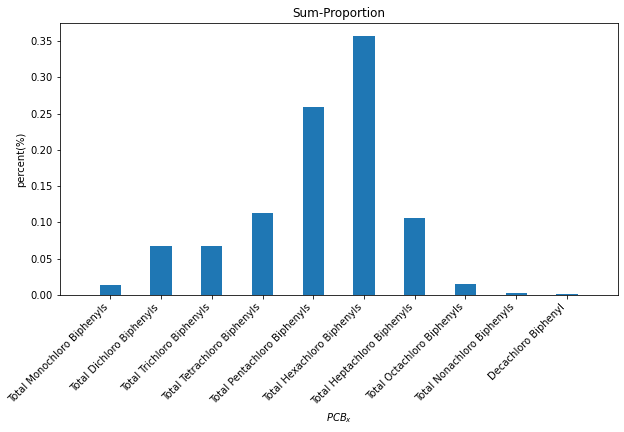

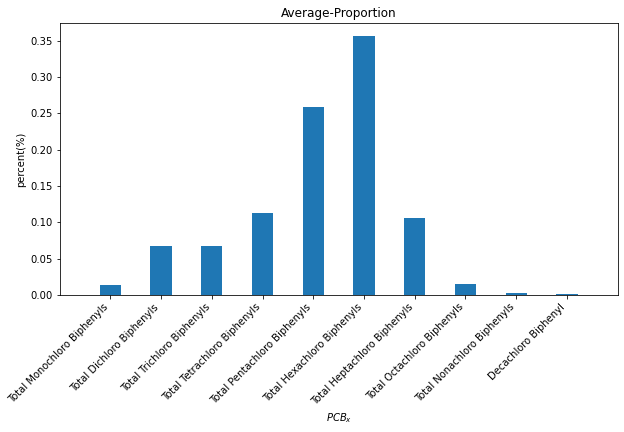

In [12]:
sheets = ("blank_corrected", "lipid_normalized")
sheet = sheets[1]
pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
c = pcb.columns.tolist()
c[0] = 'Units'
pcb.columns = c
pcb.set_index('Units', inplace=True)
selection = [i for i in pcb.index if i[:3] != 'PCB']
pcb = pcb.loc[selection, :]
pcb = pcb.iloc[:-2, :]

temp = pcb.sum(1)
temp = temp/temp.sum()
plt.figure(figsize=(10, 5), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Sum-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 45, ha = 'right')
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
if not os.path.exists('./pics/PCBs/bars/'):
    os.mkdir('./pics/PCBs/bars/')
plt.savefig(f'./pics/PCBs/bars/SUM-concentration.jpg', bbox_inches='tight')

temp = pcb.apply(lambda x: np.average(x.dropna()) if not x.dropna().empty else 0, 1)
temp = temp/temp.sum()
plt.figure(figsize=(10, 5), facecolor="white")
plt.bar(range(len(pcb.index)), temp.to_numpy(), .42)
plt.title('Average-Proportion')
plt.xticks(range(len(pcb.index)), pcb.index.str.replace('PCB-', ''), rotation = 45, ha = 'right')
plt.xlim(-1, len(pcb.index))
plt.ylabel('percent(%)')
plt.xlabel('$PCB_x$')
plt.savefig(f'./pics/PCBs/bars/average-concentration.jpg', bbox_inches='tight')

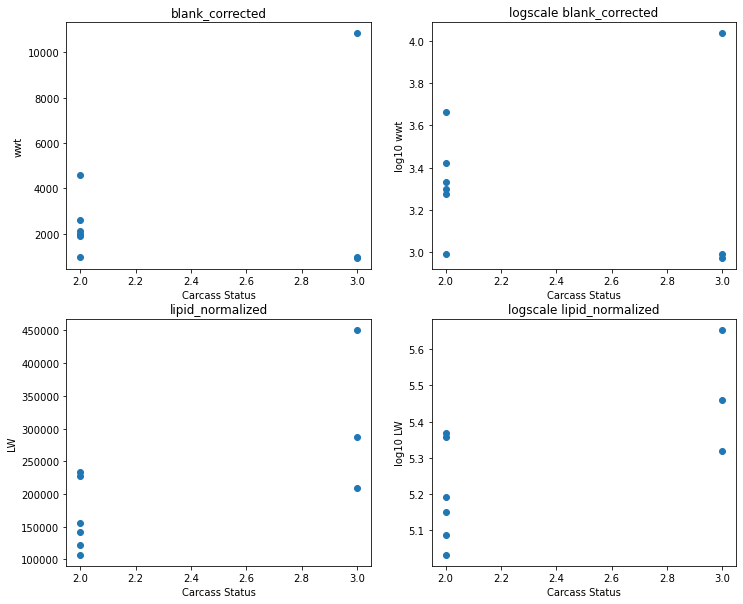

In [13]:
fish_info = pd.read_excel("fish_info.xlsx")
fish_info['Fish ID'] = fish_info['Fish ID'].astype('str')
fish_info['Carcass Status'] = fish_info['Carcass Status'].astype('int8')
sheets = ("blank_corrected", "lipid_normalized")
fig, axs = plt.subplots(2, 2, figsize = (12, 10), facecolor = 'white')
for i, ax in enumerate(axs.flatten()):
    sheet = sheets[i//2]
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    total_pcb = pd.DataFrame(pcb.iloc[-2, :]).reset_index()
    total_pcb.columns = total_pcb.iloc[0, :]
    total_pcb.drop(index = 0, inplace=True)
    total_pcb.iat[-1, 0] = '13'
    total_pcb.columns = ['Fish ID', 'Total PCBs']
    data = pd.merge(fish_info, total_pcb, how='inner', on='Fish ID')
    if i % 2 == 0:
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T)
        ax.set_title(sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('wwt')
        else:
            ax.set_ylabel('LW')
    else:
        data['Total PCBs'] = np.log10(data['Total PCBs'].to_numpy('float'))
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T)
        ax.set_title('logscale ' + sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('log10 wwt')
        else:
            ax.set_ylabel('log10 LW')
    
    ax.set_xlabel('Carcass Status')
    

fig.savefig('./pics/pcbs/vsCarcass_status.jpg')

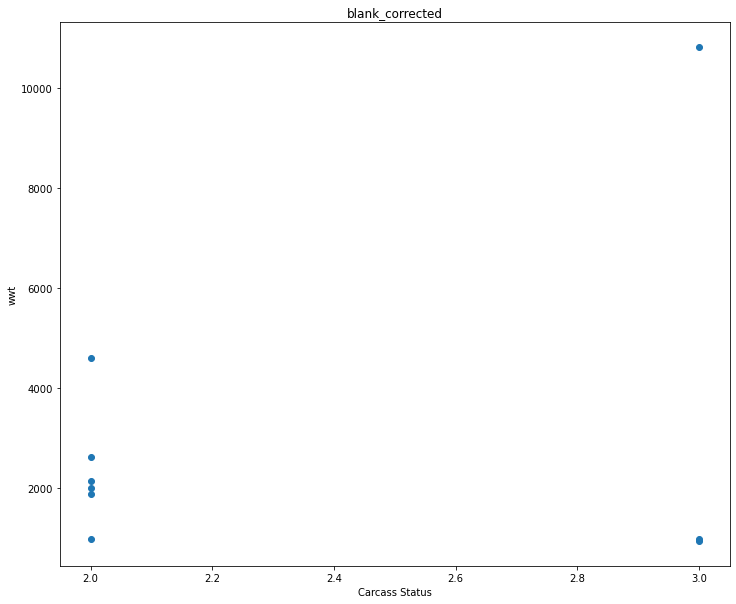

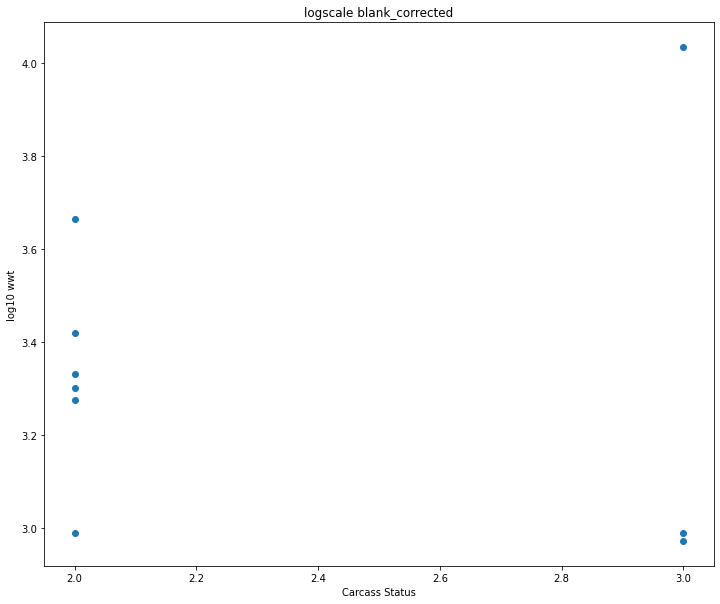

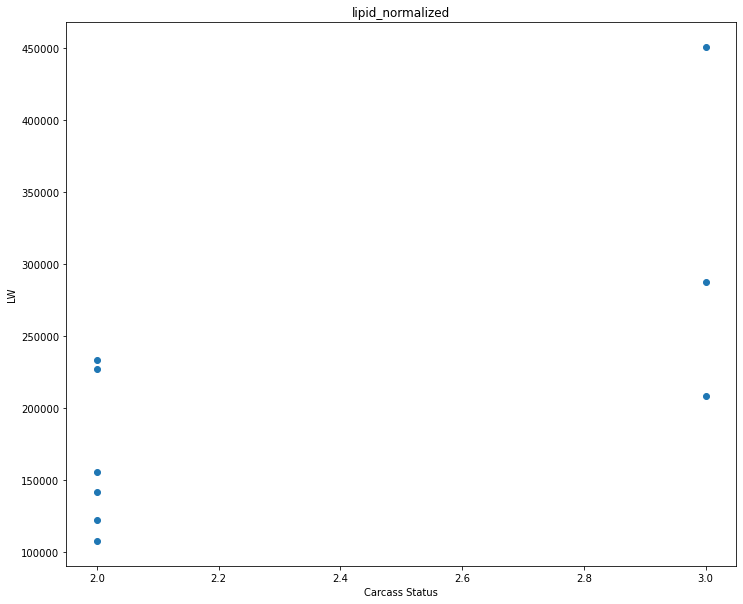

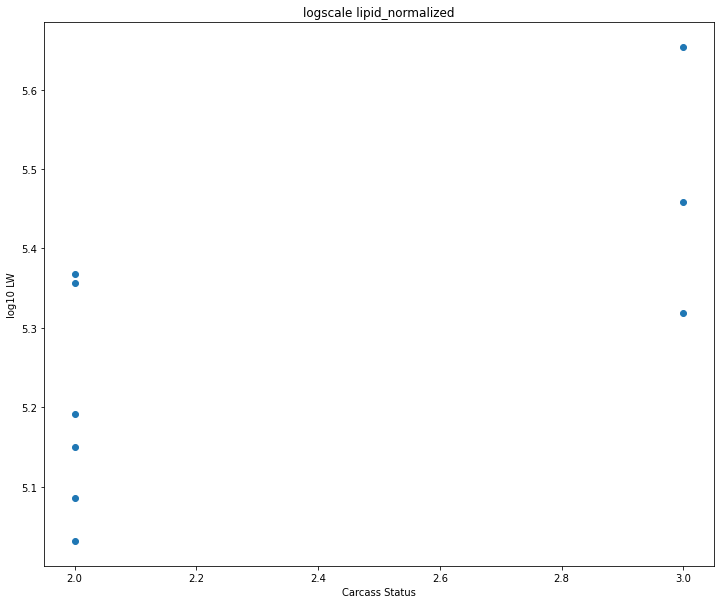

In [14]:
fish_info = pd.read_excel("fish_info.xlsx")
fish_info['Fish ID'] = fish_info['Fish ID'].astype('str')
fish_info['Carcass Status'] = fish_info['Carcass Status'].astype('int8')
sheets = ("blank_corrected", "lipid_normalized")
for i in range(4):
    fig, ax = plt.subplots(figsize = (12, 10), facecolor = 'white')
    sheet = sheets[i//2]
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    total_pcb = pd.DataFrame(pcb.iloc[-2, :]).reset_index()
    total_pcb.columns = total_pcb.iloc[0, :]
    total_pcb.drop(index = 0, inplace=True)
    total_pcb.iat[-1, 0] = '13'
    total_pcb.columns = ['Fish ID', 'Total PCBs']
    data = pd.merge(fish_info, total_pcb, how='inner', on='Fish ID')
    if i % 2 == 0:
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T)
        ax.set_title(sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('wwt')
        else:
            ax.set_ylabel('LW')
    else:
        data['Total PCBs'] = np.log10(data['Total PCBs'].to_numpy('float'))
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T)
        ax.set_title('logscale ' + sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('log10 wwt')
        else:
            ax.set_ylabel('log10 LW')
    
    ax.set_xlabel('Carcass Status')
    

    fig.savefig(f'./pics/pcbs/vsCarcass_status{i}.jpg')

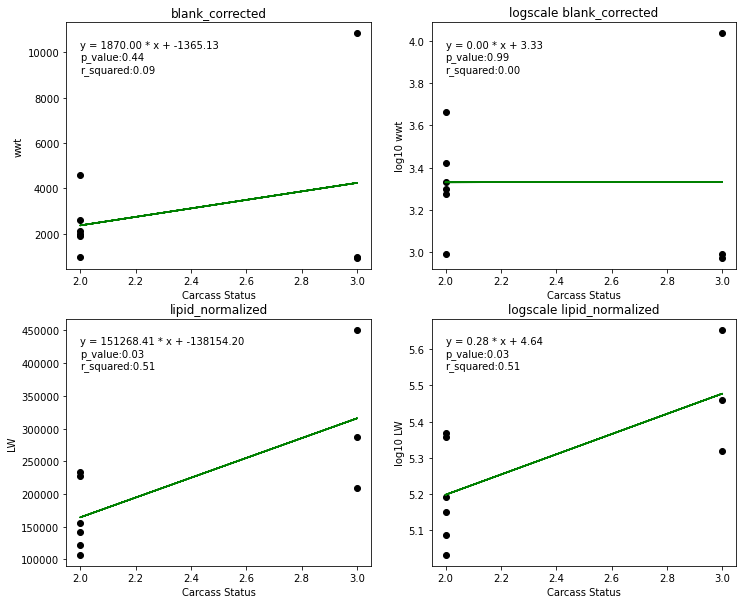

In [15]:
fish_info = pd.read_excel("fish_info.xlsx")
fish_info['Fish ID'] = fish_info['Fish ID'].astype('str')
fish_info['Carcass Status'] = fish_info['Carcass Status'].astype('int8')
sheets = ("blank_corrected", "lipid_normalized")
fig, axs = plt.subplots(2, 2, figsize = (12, 10), facecolor = 'white')
for i, ax in enumerate(axs.flatten()):
    sheet = sheets[i//2]
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    total_pcb = pd.DataFrame(pcb.iloc[-2, :]).reset_index()
    total_pcb.columns = total_pcb.iloc[0, :]
    total_pcb.drop(index = 0, inplace=True)
    total_pcb.iat[-1, 0] = '13'
    total_pcb.columns = ['Fish ID', 'Total PCBs']
    data = pd.merge(fish_info, total_pcb, how='inner', on='Fish ID')
    if i % 2 == 0:
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T,label = 'points', color = 'k')
        slope, intercept, r_value, p_value, std_err = linregress(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy('float').T)
        x = data.loc[:,'Carcass Status'].to_numpy('float')
        ax.plot(x,slope * x + intercept, label = 'linereg', color = 'green')
        ax.annotate(f'y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (2, -0.2*np.diff(ax.get_ylim())[0]+ax.get_ylim()[1]))
        ax.set_title(sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('wwt')
        else:
            ax.set_ylabel('LW')
    else:
        data['Total PCBs'] = np.log10(data['Total PCBs'].to_numpy('float'))
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T,label = 'points', color = 'k')
        slope, intercept, r_value, p_value, std_err = linregress(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy('float').T)
        x = data.loc[:,'Carcass Status'].to_numpy('float')
        ax.plot(x,slope * x + intercept, label = 'linereg', color = 'green')
        ax.annotate(f'y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (2, -0.2*np.diff(ax.get_ylim())[0]+ax.get_ylim()[1]))
        ax.set_title('logscale ' + sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('log10 wwt')
        else:
            ax.set_ylabel('log10 LW')

    ax.set_xlabel('Carcass Status')


fig.savefig('./pics/pcbs/vsCarcass_status.jpg')

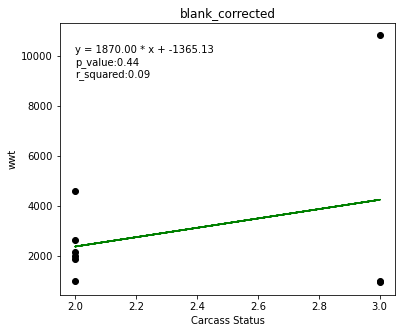

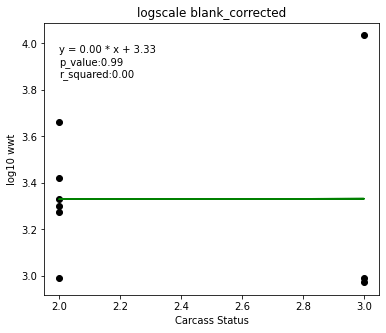

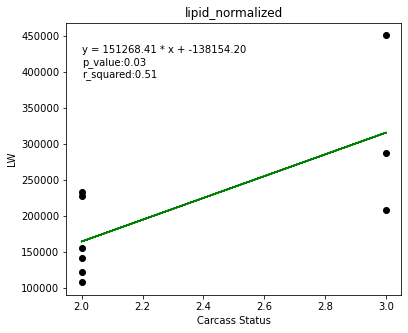

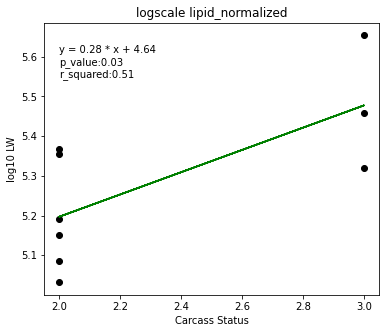

In [16]:
fish_info = pd.read_excel("fish_info.xlsx")
fish_info['Fish ID'] = fish_info['Fish ID'].astype('str')
fish_info['Carcass Status'] = fish_info['Carcass Status'].astype('int8')
sheets = ("blank_corrected", "lipid_normalized")
for i in range(4):
    fig, ax = plt.subplots(figsize = (6, 5), facecolor = 'white')
    sheet = sheets[i//2]
    pcb = pd.read_excel("./generated excels/pcb.xlsx", sheet_name=sheet)
    c = pcb.columns.tolist()
    c[0] = 'Units'
    pcb.columns = c
    total_pcb = pd.DataFrame(pcb.iloc[-2, :]).reset_index()
    total_pcb.columns = total_pcb.iloc[0, :]
    total_pcb.drop(index = 0, inplace=True)
    total_pcb.iat[-1, 0] = '13'
    total_pcb.columns = ['Fish ID', 'Total PCBs']
    data = pd.merge(fish_info, total_pcb, how='inner', on='Fish ID')
    if i % 2 == 0:
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T,label = 'points', color = 'k')
        slope, intercept, r_value, p_value, std_err = linregress(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy('float').T)
        x = data.loc[:,'Carcass Status'].to_numpy('float')
        ax.plot(x,slope * x + intercept, label = 'linereg', color = 'green')
        ax.annotate(f'y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (2, -0.2*np.diff(ax.get_ylim())[0]+ax.get_ylim()[1]))
        ax.set_title(sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('wwt')
        else:
            ax.set_ylabel('LW')
    else:
        data['Total PCBs'] = np.log10(data['Total PCBs'].to_numpy('float'))
        ax.scatter(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy().T,label = 'points', color = 'k')
        slope, intercept, r_value, p_value, std_err = linregress(*data.loc[:, ['Carcass Status', 'Total PCBs']].to_numpy('float').T)
        x = data.loc[:,'Carcass Status'].to_numpy('float')
        ax.plot(x,slope * x + intercept, label = 'linereg', color = 'green')
        ax.annotate(f'y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (2, -0.2*np.diff(ax.get_ylim())[0]+ax.get_ylim()[1]))
        ax.set_title('logscale ' + sheet)
        if sheet == "blank_corrected":  
            ax.set_ylabel('log10 wwt')
        else:
            ax.set_ylabel('log10 LW')

    ax.set_xlabel('Carcass Status')


fig.savefig('./pics/pcbs/vsCarcass_status.jpg')

In [17]:
fish_info

,Fish ID,Age,Total length (cm),Fork length(cm),Total Weight (kg),Fulton Condition factor (K),Day fish observed dead,Decomposition,Carcass Status
0,1,41,214.5,193,46.6,0.47,2011-08-01,advanced,3
1,2,41,189.0,167,43.2,0.64,2026-08-01,fresh,2
2,3,60*,221.0,205,39.4,0.37,2026-08-01,advanced,3
3,4,40,189.0,169,34.8,0.52,2027-08-01,fresh,2
4,5,63,251.0,228,67.9,0.43,2027-08-01,fresh,2
5,6,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4
6,7,55,NaN,229*,82.0,NaN,2028-08-01,fresh,2
7,8,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4
8,9,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4
9,10,38*,247.5,220,74.9,0.49,2028-08-01,advanced,3


In [18]:
data

,Fish ID,Age,Total length (cm),Fork length(cm),Total Weight (kg),Fulton Condition factor (K),Day fish observed dead,Decomposition,Carcass Status,Total PCBs
0,1,41,214.5,193,46.6,0.47,2011-08-01,advanced,3,5.458949
1,2,41,189.0,167,43.2,0.64,2026-08-01,fresh,2,5.367563
2,3,60*,221.0,205,39.4,0.37,2026-08-01,advanced,3,5.653944
3,4,40,189.0,169,34.8,0.52,2027-08-01,fresh,2,5.150231
4,5,63,251.0,228,67.9,0.43,2027-08-01,fresh,2,5.356035
5,7,55,NaN,229*,82.0,NaN,2028-08-01,fresh,2,5.031386
6,10,38*,247.5,220,74.9,0.49,2028-08-01,advanced,3,5.319083
7,11,68*,223.0,203.5,65.1,0.59,1930-08-01,fresh,2,5.191772
8,13,12,114.0,99.5,6.6,0.45,2014-09-01,fresh,2,5.085795
